<a href="https://colab.research.google.com/github/ricsilrib/teoria-dos-grafos-trabalho-pratico-1/blob/main/segunda_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

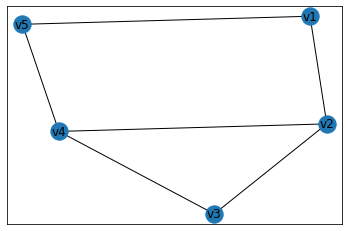

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node('v1')
G.add_node('v2')
G.add_node('v3')
G.add_node('v4')
G.add_node('v5')

G.add_edge('v1', 'v2')
G.add_edge('v2', 'v3')
G.add_edge('v3', 'v4')
G.add_edge('v4', 'v5')
G.add_edge('v5', 'v1')
G.add_edge('v2', 'v4')

plt.figure(2)
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

# Função "ehRegular"

In [ ]:
def ehRegular(G):
    no_1 = nx.utils.arbitrary_element(G)
    grau1 = G.degree(no_1)
    return all(grau1 == grau for _, grau in G.degree)

ehRegular(G)

False

Fontes de pesquisa:

Módulo: https://networkx.org/documentation/stable/_modules/networkx/utils/misc.html

all(): https://docs.python.org/3/library/functions.html#all

# Função "ehCompleto"

In [ ]:
def ehCompleto(G):
  n_v = G.number_of_nodes()
  n_e = G.number_of_edges()
  
  if (n_e ==(n_v*(n_v-1))/2):
    return True
  else:
    return False

ehCompleto(G)

False

# Função "ehConexo"

In [ ]:
def dfs_ehConexo(G, v):
    V = set(G.nodes)
    if v in V:
        visitados = set()
        nao_visitados = {v for v in V}
        pilha = []
        nao_visitados.remove(v)
        visitados.add(v)     
        pilha.append(v)
        while pilha:
            vt = pilha[-1]
            adjacentes_vt = set(G.neighbors(vt))
            for w in adjacentes_vt:
                if adjacentes_vt <= visitados:
                    pilha.pop()
                    break
                elif w not in visitados:
                    nao_visitados.remove(w)
                    visitados.add(w)
                    pilha.append(w)         
                    break
        return nao_visitados

Fontes de pesquisa:

Módulo: https://networkx.org/documentation/stable/tutorial.html

In [ ]:
def ehConexo(G):
  V = list(G.nodes)
  return len(dfs_ehConexo(G, V[0])) == 0
  
ehConexo(G)

True

## Testes do "ehConexo" com dois outros grafos

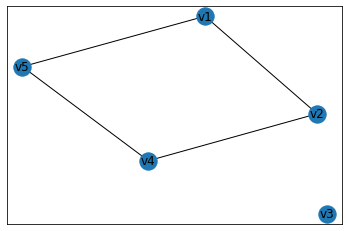

False

In [ ]:
G2 = nx.Graph()
G2.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5'])

G2.add_edges_from([('v1', 'v2'), ('v4', 'v5'), 
                   ('v5', 'v1'), ('v2', 'v4')])

plt.figure(2)
nx.draw_networkx(G2, pos=nx.spring_layout(G), with_labels=True)
plt.show()

print()

ehConexo(G2)

[('v1', 'v2'), ('v2', 'v4'), ('v4', 'v5')]



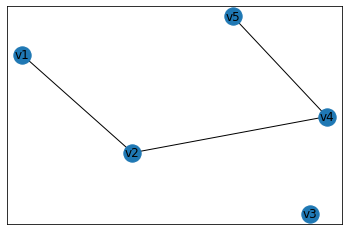


False


In [ ]:
def dfs(G, v):
    V = set(G.nodes)
    if v in V:
        visitados = set()
        caminho = []
        pilha = []       
        visitados.add(v)     
        pilha.append(v)
        while pilha:
            vt = pilha[-1]
            adjacentes_vt = set(G.neighbors(vt))
            for w in adjacentes_vt:
                if adjacentes_vt <= visitados:
                    pilha.pop()
                    break
                elif w not in visitados:
                    visitados.add(w)
                    pilha.append(w)
                    aresta = (vt, w)
                    caminho.append(aresta)
                    break
        return caminho

G3 = nx.Graph()
G3.add_nodes_from(list(G2.nodes))
G3.add_edges_from(dfs(G2, 'v1'))

print(dfs(G2, 'v1'))
print()



plt.figure(2)
nx.draw_networkx(G3, pos=nx.spring_layout(G), with_labels=True)
plt.show()

print()

print(ehConexo(G3))